Import Libraries

In [4]:
import os
import cv2
import numpy as np
import seaborn as sns
import pandas as pd
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance, ImageFilter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Data loading

In [5]:
# Define the path to the folder containing images
folder_path = '/content/drive/MyDrive/brain_tumor_dataset'

# List all files in the folder
image_files = os.listdir(folder_path)

Images from folder1:


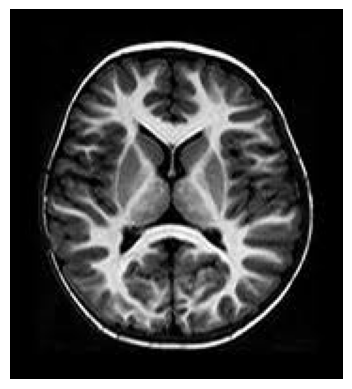

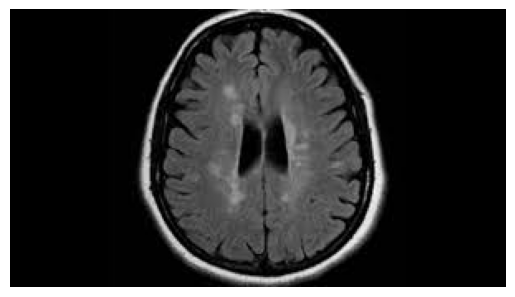

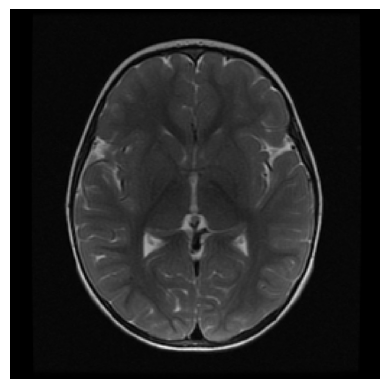

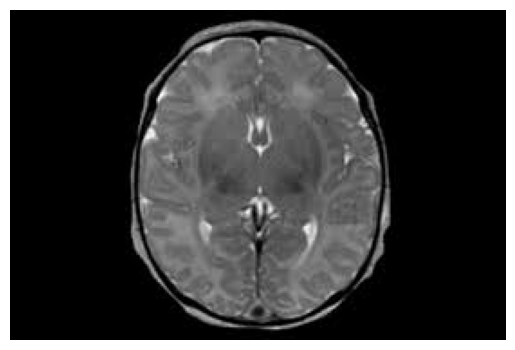

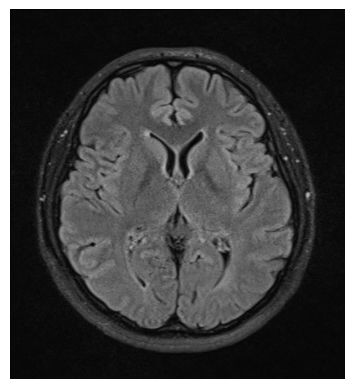

Images from folder2:


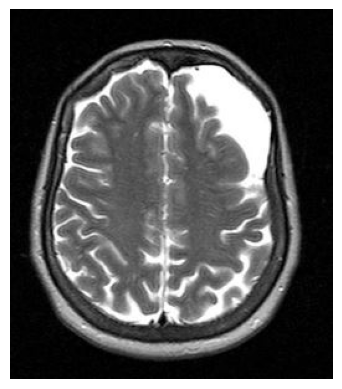

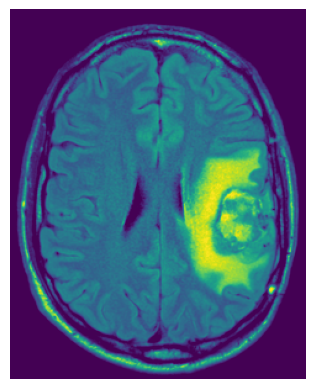

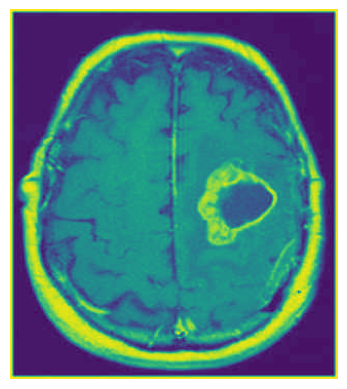

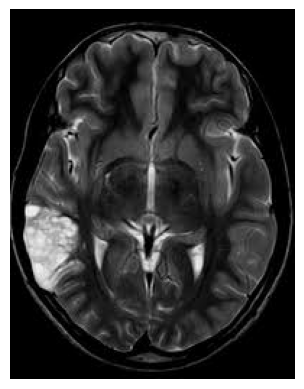

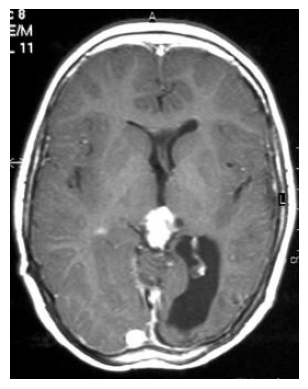

In [6]:
# Define the paths to the subfolders
folder_yes_path = '/content/drive/MyDrive/brain_tumor_dataset/no'
folder_no_path = '/content/drive/MyDrive/brain_tumor_dataset/yes'

# Function to load and display images from a folder
def load_and_display_images(folder_path):
    image_files = os.listdir(folder_path)
    for image_file in image_files[:5]:  # Adjust the number of images to display as needed
        image_path = os.path.join(folder_path, image_file)
        image = Image.open(image_path)
        plt.imshow(image)
        plt.axis('off')
        plt.show()

# Load and display images from folder1
print("Images from folder1:")
load_and_display_images(folder_yes_path)

# Load and display images from folder2
print("Images from folder2:")
load_and_display_images(folder_no_path)


Data Preprocessing

Preprocessed images from the 'yes' folder (tumor):


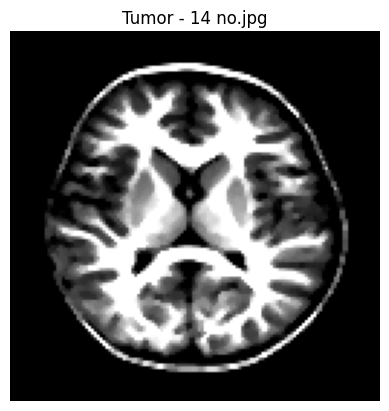

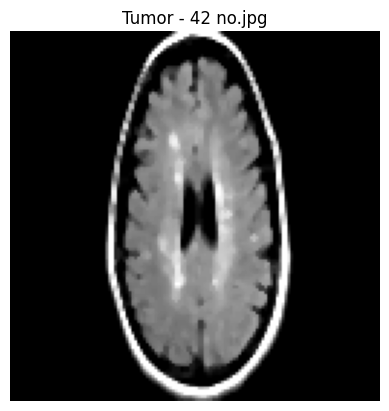

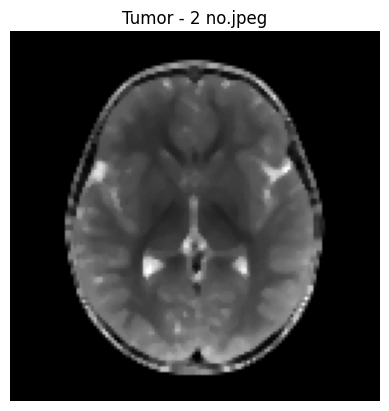

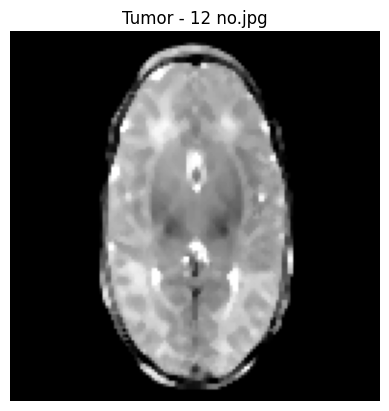

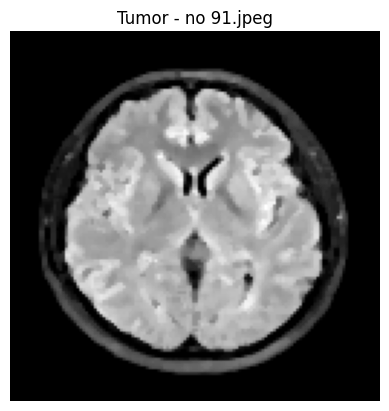

Preprocessed images from the 'no' folder (no tumor):


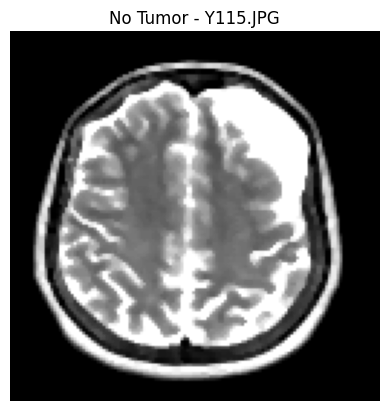

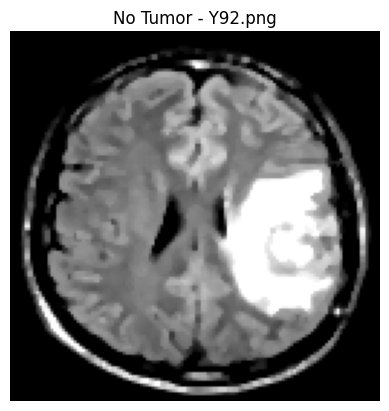

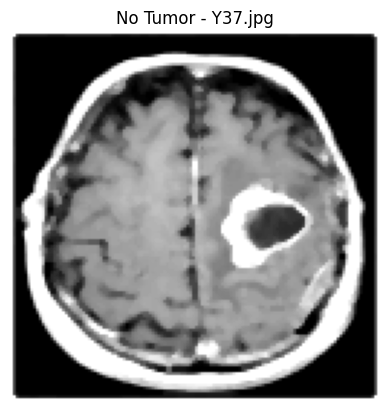

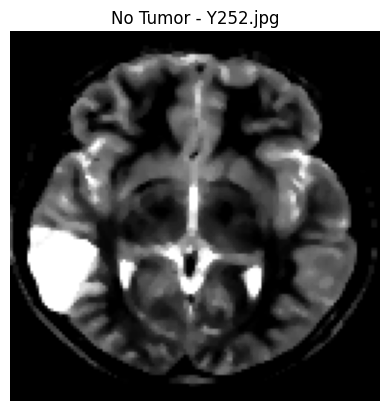

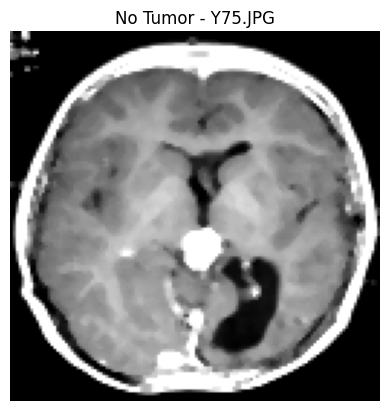

In [7]:
#  Function to preprocess images: resize, normalize, remove noise, and enhance contrast
def preprocess_image(image_path):
    # Open the image
    image = Image.open(image_path).convert('L')  # Convert to grayscale

    # Resize the image to a fixed size (128x128)
    image = image.resize((128, 128))

    # Enhance the contrast of the image
    enhancer = ImageEnhance.Contrast(image)

    # Increase contrast by a factor of 2
    image = enhancer.enhance(2.0)

    # Apply a median filter to remove noise
    image = image.filter(ImageFilter.MedianFilter(size=3))

    # Convert image to numpy array and normalize to range [0, 1]
    image_array = np.array(image) / 255.0

    return image_array

# Function to load, preprocess, and display images from a folder
def load_preprocess_and_display_images(folder_path, label):
    image_files = os.listdir(folder_path)
    for image_file in image_files[:5]:
        image_path = os.path.join(folder_path, image_file)
        preprocessed_image = preprocess_image(image_path)

        # Display the preprocessed image
        plt.imshow(preprocessed_image, cmap='gray')
        plt.title(f'{label} - {image_file}')
        plt.axis('off')
        plt.show()

# Load, preprocess, and display images from the "yes" folder
print("Preprocessed images from the 'yes' folder (tumor):")
load_preprocess_and_display_images(folder_yes_path, 'Tumor')

# Load, preprocess, and display images from the "no" folder
print("Preprocessed images from the 'no' folder (no tumor):")
load_preprocess_and_display_images(folder_no_path, 'No Tumor')

Implementing Classification Models


In [8]:
# Load and preprocess images from a folder
def load_images_from_folder(folder_path, label):
    images = []
    labels = []
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        preprocessed_image = preprocess_image(image_path)
        images.append(preprocessed_image)
        labels.append(label)
    return images, labels

# Load and preprocess images
tumor_images, tumor_labels = load_images_from_folder(folder_yes_path, 1)
normal_images, normal_labels = load_images_from_folder(folder_no_path, 0)

# Combine and split the dataset
X = np.array(tumor_images + normal_images)
y = np.array(tumor_labels + normal_labels)
X = X.reshape(X.shape[0], -1)  # Flatten images for traditional ML models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


SVM

In [ ]:
# Train SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Evaluate SVM
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.7450980392156863
              precision    recall  f1-score   support

           0       0.79      0.62      0.70        24
           1       0.72      0.85      0.78        27

    accuracy                           0.75        51
   macro avg       0.75      0.74      0.74        51
weighted avg       0.75      0.75      0.74        51



LOGISTIC REGRESSION

In [ ]:
# Train Logistic Regression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Evaluate Logistic Regression
y_pred_log_reg = log_reg_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.7254901960784313
              precision    recall  f1-score   support

           0       0.78      0.58      0.67        24
           1       0.70      0.85      0.77        27

    accuracy                           0.73        51
   macro avg       0.74      0.72      0.72        51
weighted avg       0.73      0.73      0.72        51



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RANDOM FOREST CLASSIFIER

In [ ]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7647058823529411
              precision    recall  f1-score   support

           0       0.83      0.62      0.71        24
           1       0.73      0.89      0.80        27

    accuracy                           0.76        51
   macro avg       0.78      0.76      0.76        51
weighted avg       0.78      0.76      0.76        51



CNN

In [ ]:
# Reshape data for CNN
X = np.array(tumor_images + normal_images)
X = X.reshape(X.shape[0], 128, 128, 1)  # Reshape to (num_samples, height, width, channels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CNN model
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate CNN
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
print("CNN Accuracy:", cnn_accuracy)


Epoch 1/10
7/7 [==============================] - 6s 629ms/step - loss: 0.8844 - accuracy: 0.5842 - val_loss: 0.6140 - val_accuracy: 0.6275
Epoch 2/10
7/7 [==============================] - 4s 595ms/step - loss: 0.5085 - accuracy: 0.8020 - val_loss: 0.6556 - val_accuracy: 0.6667
Epoch 3/10
7/7 [==============================] - 6s 916ms/step - loss: 0.4310 - accuracy: 0.8317 - val_loss: 0.6015 - val_accuracy: 0.7059
Epoch 4/10
7/7 [==============================] - 4s 608ms/step - loss: 0.4049 - accuracy: 0.8366 - val_loss: 0.6663 - val_accuracy: 0.7059
Epoch 5/10
7/7 [==============================] - 4s 592ms/step - loss: 0.3393 - accuracy: 0.8515 - val_loss: 0.5944 - val_accuracy: 0.7647
Epoch 6/10
7/7 [==============================] - 6s 863ms/step - loss: 0.2821 - accuracy: 0.9010 - val_loss: 0.6466 - val_accuracy: 0.7647
Epoch 7/10
7/7 [==============================] - 5s 635ms/step - loss: 0.2023 - accuracy: 0.9257 - val_loss: 0.7582 - val_accuracy: 0.7451
Epoch 8/10
7/7 [====

Evaluation Report of SVM, Logistic Regression, Random Forest and CNN

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.62      0.70        24
           1       0.72      0.85      0.78        27

    accuracy                           0.75        51
   macro avg       0.75      0.74      0.74        51
weighted avg       0.75      0.75      0.74        51

SVM Accuracy: 0.7450980392156863


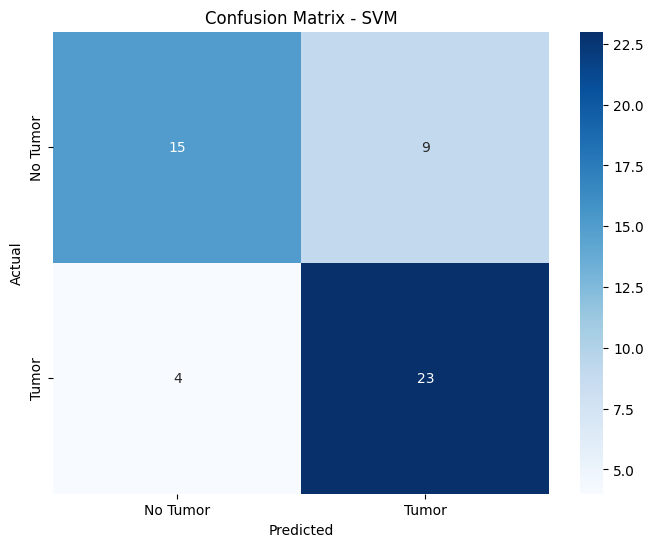

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.58      0.67        24
           1       0.70      0.85      0.77        27

    accuracy                           0.73        51
   macro avg       0.74      0.72      0.72        51
weighted avg       0.73      0.73      0.72        51

Logistic Regression Accuracy: 0.7254901960784313


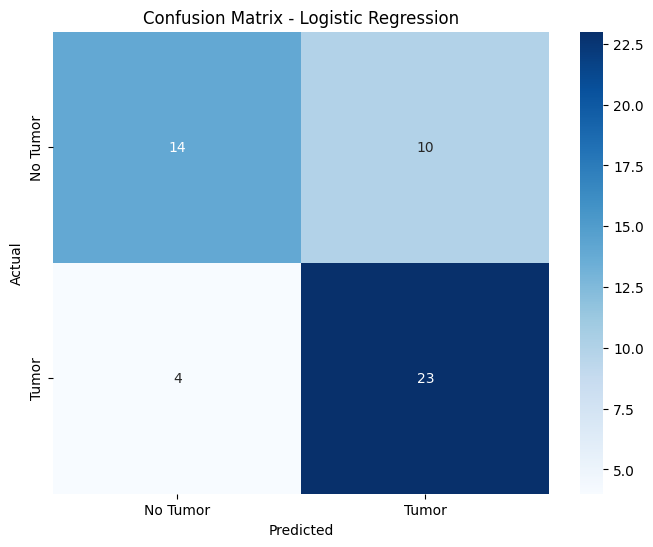

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.62      0.71        24
           1       0.73      0.89      0.80        27

    accuracy                           0.76        51
   macro avg       0.78      0.76      0.76        51
weighted avg       0.78      0.76      0.76        51

Random Forest Accuracy: 0.7647058823529411


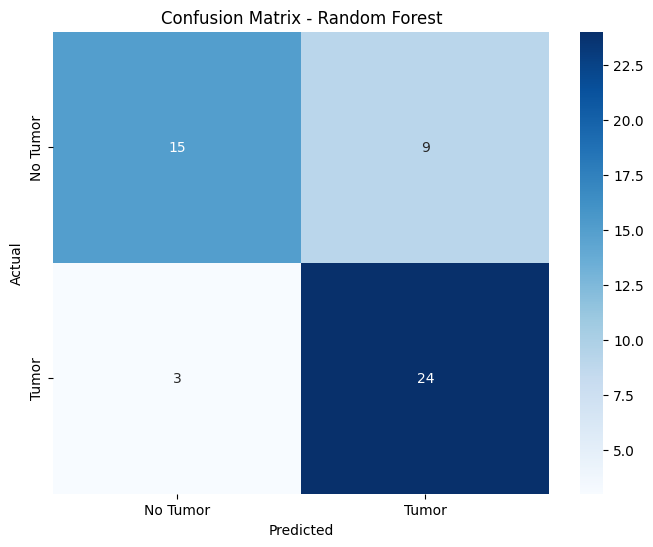

2/2 [==============================] - 1s 145ms/step
CNN Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.62      0.68        24
           1       0.71      0.81      0.76        27

    accuracy                           0.73        51
   macro avg       0.73      0.72      0.72        51
weighted avg       0.73      0.73      0.72        51

CNN Accuracy: 0.7254902124404907


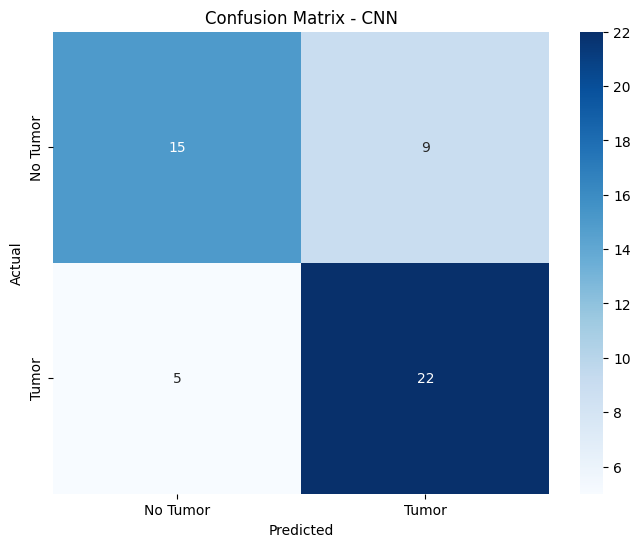

<ipython-input-17-49c0b18e4e90>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


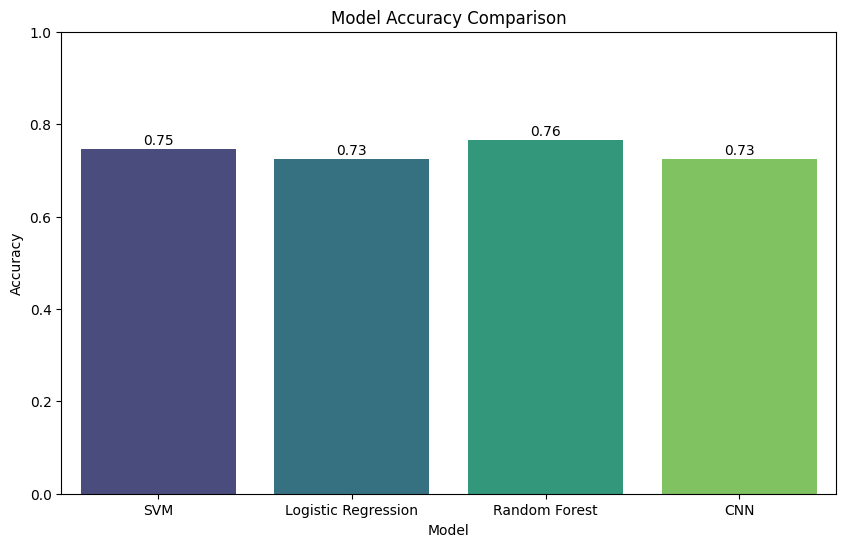

In [ ]:
# Flatten the data for SVM, Logistic Regression, and Random Forest
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Evaluate and plot for SVM
y_pred_svm = svm_model.predict(X_test_flat)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
plot_confusion_matrix(y_test, y_pred_svm, 'SVM')

# Evaluate and plot for Logistic Regression
y_pred_log_reg = log_reg_model.predict(X_test_flat)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
plot_confusion_matrix(y_test, y_pred_log_reg, 'Logistic Regression')

# Evaluate and plot for Random Forest
y_pred_rf = rf_model.predict(X_test_flat)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')

# Evaluate and plot for CNN
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
y_pred_cnn = (cnn_model.predict(X_test) > 0.5).astype("int32")

print("CNN Classification Report:")
print(classification_report(y_test, y_pred_cnn))
print("CNN Accuracy:", cnn_accuracy)
plot_confusion_matrix(y_test, y_pred_cnn, 'CNN')

# Summary of accuracies
model_names = ['SVM', 'Logistic Regression', 'Random Forest', 'CNN']
accuracies = [accuracy_score(y_test, y_pred_svm),
              accuracy_score(y_test, y_pred_log_reg),
              accuracy_score(y_test, y_pred_rf),
              cnn_accuracy]

# Plot model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i in range(len(accuracies)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center')
plt.show()


CONCLUSION:Therefore Random Forest has the most accuracy amongst other classification reports

CarryOut Prediction using Random Forest Classifier

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.62      0.71        24
           1       0.73      0.89      0.80        27

    accuracy                           0.76        51
   macro avg       0.78      0.76      0.76        51
weighted avg       0.78      0.76      0.76        51

Random Forest Accuracy: 0.7647058823529411


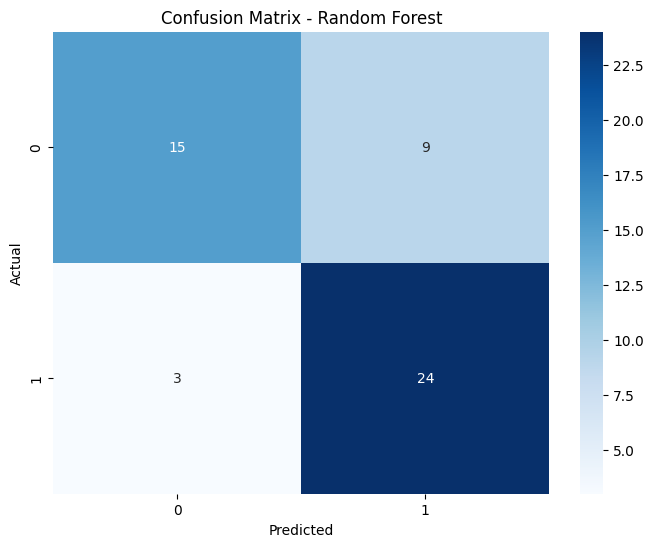

In [ ]:
# Assume X_train_flat, X_test_flat, y_train, y_test are already defined
scaler = StandardScaler()
X_train_flat_scaled = scaler.fit_transform(X_train_flat)
X_test_flat_scaled = scaler.transform(X_test_flat)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_flat_scaled, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test_flat_scaled)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')


In [ ]:
# Function to preprocess a single image
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((128, 128))  # Resize to match training dimensions
    img_array = np.array(img) / 255.0  # Normalize
    img_array = img_array.flatten().reshape(1, -1)  # Flatten and reshape
    return scaler.transform(img_array)

# Function to classify a single image
def classify_image(image_path):
    img_preprocessed = preprocess_image(image_path)
    prediction = rf_model.predict(img_preprocessed)
    return "Tumor" if prediction[0] == 1 else "Normal"


Testing Single Image for Classifcation of Tumor

In [ ]:
# Test the pipeline with an example image
example_image_path = '/content/drive/MyDrive/brain_tumor_dataset/yes/Y1.jpg'
result = classify_image(example_image_path)
print(f'The image is classified as: {result}')


The image is classified as: Tumor


Testing entire Folders for Classification of Tumor

In [ ]:
# Example function to load and classify multiple images from a folder
def classify_images_from_folder(folder_path):
    image_files = os.listdir(folder_path)
    results = {}
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        result = classify_image(image_path)
        results[image_file] = result
    return results

# Classify images from both folders
results_yes = classify_images_from_folder('/content/drive/MyDrive/brain_tumor_dataset/yes')
results_no = classify_images_from_folder('/content/drive/MyDrive/brain_tumor_dataset/no')

print("Results for images with tumor:")
print(results_yes)

print("Results for images without tumor:")
print(results_no)


Results for images with tumor:
{'Y115.JPG': 'Tumor', 'Y92.png': 'Tumor', 'Y37.jpg': 'Tumor', 'Y252.jpg': 'Tumor', 'Y75.JPG': 'Tumor', 'Y90.jpg': 'Normal', 'Y65.JPG': 'Tumor', 'Y9.jpg': 'Tumor', 'Y38.jpg': 'Tumor', 'Y109.JPG': 'Tumor', 'Y52.jpg': 'Tumor', 'Y182.JPG': 'Tumor', 'Y257.jpg': 'Tumor', 'Y3.jpg': 'Tumor', 'Y112.JPG': 'Tumor', 'Y61.jpg': 'Tumor', 'Y107.jpg': 'Tumor', 'Y188.jpg': 'Tumor', 'Y34.jpg': 'Tumor', 'Y81.jpg': 'Tumor', 'Y31.jpg': 'Tumor', 'Y247.JPG': 'Tumor', 'Y106.jpg': 'Tumor', 'Y14.jpg': 'Tumor', 'Y44.JPG': 'Tumor', 'Y32.jpg': 'Tumor', 'Y153.jpg': 'Tumor', 'Y77.jpg': 'Tumor', 'Y258.JPG': 'Tumor', 'Y165.JPG': 'Tumor', 'Y187.jpg': 'Tumor', 'Y35.jpg': 'Tumor', 'Y170.JPG': 'Tumor', 'Y185.jpg': 'Tumor', 'Y40.JPG': 'Tumor', 'Y164.JPG': 'Tumor', 'Y117.JPG': 'Tumor', 'Y20.jpg': 'Tumor', 'Y54.jpg': 'Tumor', 'Y253.JPG': 'Tumor', 'Y41.jpg': 'Tumor', 'Y66.JPG': 'Tumor', 'Y86.JPG': 'Tumor', 'Y51.jpg': 'Tumor', 'Y244.JPG': 'Tumor', 'Y114.JPG': 'Normal', 'Y73.jpg': 'Tumor', 'Y79.jp